In [1]:
!git clone https://github.com/JayRGopal/reg-explain.git

Cloning into 'reg-explain'...
remote: Enumerating objects: 61960, done.
remote: Counting objects: 100% (207/207), done.
remote: Compressing objects: 100% (198/198), done.
remote: Total 61960 (delta 15), reused 196 (delta 8), pack-reused 61753
Receiving objects: 100% (61960/61960), 227.38 MiB | 22.29 MiB/s, done.
Resolving deltas: 100% (186/186), done.


In [ ]:
!rm -r reg-explain/

In [2]:
import matplotlib.pyplot as plt
from PIL import Image

## Simple CNN

In [ ]:
path = "/content/reg-explain/Simple_CNN_Results/"
conditions = {"control_4e" : "Control_4e/images_control_4e/",
              "control_8e" : "Control_8e/images_control_8e/",
              "dropout_4e" : "Dropout_4e_0.3/images_dropout_4e/",
              "dropout_8e" : "Dropout_8e_0.3/images_dropout_8e/",
              "l2_4e_5" : "L2_4e_1e-5/images_l2_4e_5/",
              "l2_4e_8" : "L2_4e_1e-8/images_l2_4e_8/",
              "l2_8e_5" : "L2_8e_1e-5/images_l2_8e_5/",
              "l2_8e_8" : "L2_8e_1e-8/images_l2_8e_8/",
              "l2_4e_5_dropout" : "L2_dropout_4e_1e-5_0.3/images_l2_4e_5_dropout/",
              "l2_4e_8_dropout" : "L2_dropout_4e_1e-8_0.3/images_l2_4e_8_dropout/",
              "l2_8e_5_dropout" : "L2_dropout_8e_1e-5_0.3/images_l2_8e_5_dropout/",
              "l2_8e_8_dropout" : "L2_dropout_8e_1e-8_0.3/images_l2_8e_8_dropout/"}
classes = ["bird", "car", "cat", "deer", "dog", "frog", "horse", "plane", "ship", "truck"]
im_type = {"dl" : "_deeplift.png", "gr" : "_gradient.png", "ig" : "_integrated.png", "sg" : "_smoothGrad.png"}
im_type_readbale = {"dl" : "DeepLIFT", "gr" : "Gradient Magnitudes", "ig" : "Integrated Gradients", "sg" : "SmoothGrad"}

findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


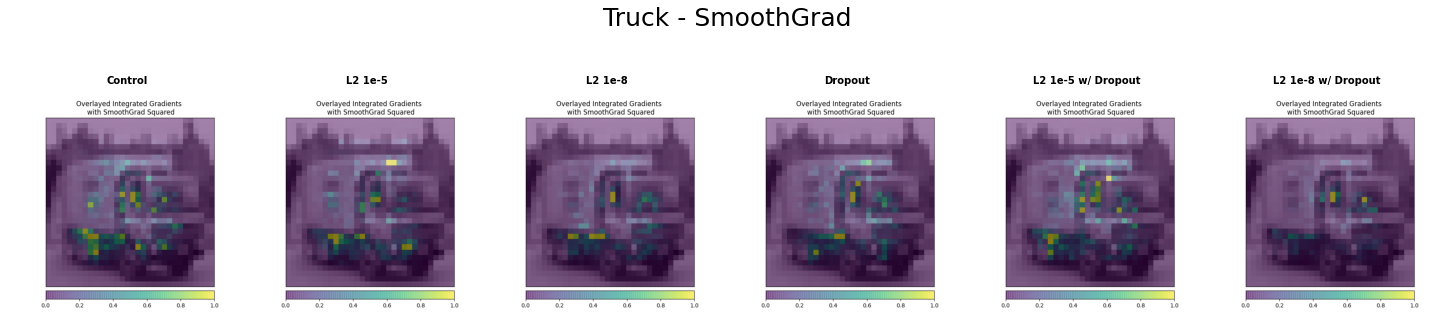

In [ ]:
'''
Plot comparing 8 epochs gradient for one class of each type
'''

plot_conds_col = {0 : "control_8e", 1 : "l2_8e_5", 2 : "l2_8e_8", 3 : "dropout_8e", 4 : "l2_8e_5_dropout", 5 : "l2_8e_8_dropout"}
fig1 = plt.figure(figsize=(20, 15))

font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 10}

plot_conds_readable = {"control_8e" : "Control", "l2_8e_5" : "L2 1e-5", "l2_8e_8" : "L2 1e-8", "dropout_8e" : "Dropout", "l2_8e_5_dropout" : "L2 1e-5 w/ Dropout", "l2_8e_8_dropout" : "L2 1e-8 w/ Dropout"}

for curr_class in classes:
  for im in im_type.keys():
    im_count = 1
    for row in range(6):
      curr_cond = conditions[plot_conds_col[row]]
      curr_type = im_type[im]
      curr_type_readbale = im_type_readbale[im]

      # curr_class = classes[6
      image_path = path + curr_cond + curr_class + curr_type
      curr_image = Image.open(image_path)

      ax = fig1.add_subplot(1, 6, im_count)
      ax.imshow(curr_image)
      ax.axis("off")
      ax.set_title(plot_conds_readable[plot_conds_col[row]], font)
      im_count+=1

    fig1.suptitle("{} - {}".format(curr_class.capitalize(), curr_type_readbale), y = 0.67 ,fontsize = 25, va = "baseline")
    plt.tight_layout(0, 0 ,0)
    # plt.subplot_tool()
    fig1.savefig('{}_{}.png'.format(curr_class, curr_type_readbale), dpi = 100, bbox_inches='tight')

In [ ]:
from google.colab import files
import os

!zip -r /content/figures.zip /content/*.png
files.download('/content/figures.zip')

  adding: content/bird_DeepLIFT.png (deflated 9%)
  adding: content/bird_Gradient Magnitudes.png (deflated 8%)
  adding: content/bird_Integrated Gradients.png (deflated 8%)
  adding: content/bird_SmoothGrad.png (deflated 9%)
  adding: content/car_DeepLIFT.png (deflated 8%)
  adding: content/car_Gradient Magnitudes.png (deflated 8%)
  adding: content/car_Integrated Gradients.png (deflated 8%)
  adding: content/car_SmoothGrad.png (deflated 9%)
  adding: content/cat_DeepLIFT.png (deflated 8%)
  adding: content/cat_Gradient Magnitudes.png (deflated 7%)
  adding: content/cat_Integrated Gradients.png (deflated 8%)
  adding: content/cat_SmoothGrad.png (deflated 9%)
  adding: content/deer_DeepLIFT.png (deflated 8%)
  adding: content/deer_Gradient Magnitudes.png (deflated 7%)
  adding: content/deer_Integrated Gradients.png (deflated 8%)
  adding: content/deer_SmoothGrad.png (deflated 9%)
  adding: content/dog_DeepLIFT.png (deflated 8%)
  adding: content/dog_Gradient Magnitudes.png (deflated 7%)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Resnet50

In [5]:
path = "/content/reg-explain/Resnet50_Results/"
conditions = {"control" : "resnet-control/",
              "dropout" : "resnet-dropout/",
              "l2" : "resnet-l2/"}
classes = ["bird", "car", "cat", "deer", "dog", "frog", "horse", "plane", "ship", "truck"]
im_type = {"gr" : "_gradient.png", "ig" : "_integrated.png"}
im_type_readbale = {"gr" : "Gradient Magnitudes", "ig" : "Integrated Gradients"}

findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


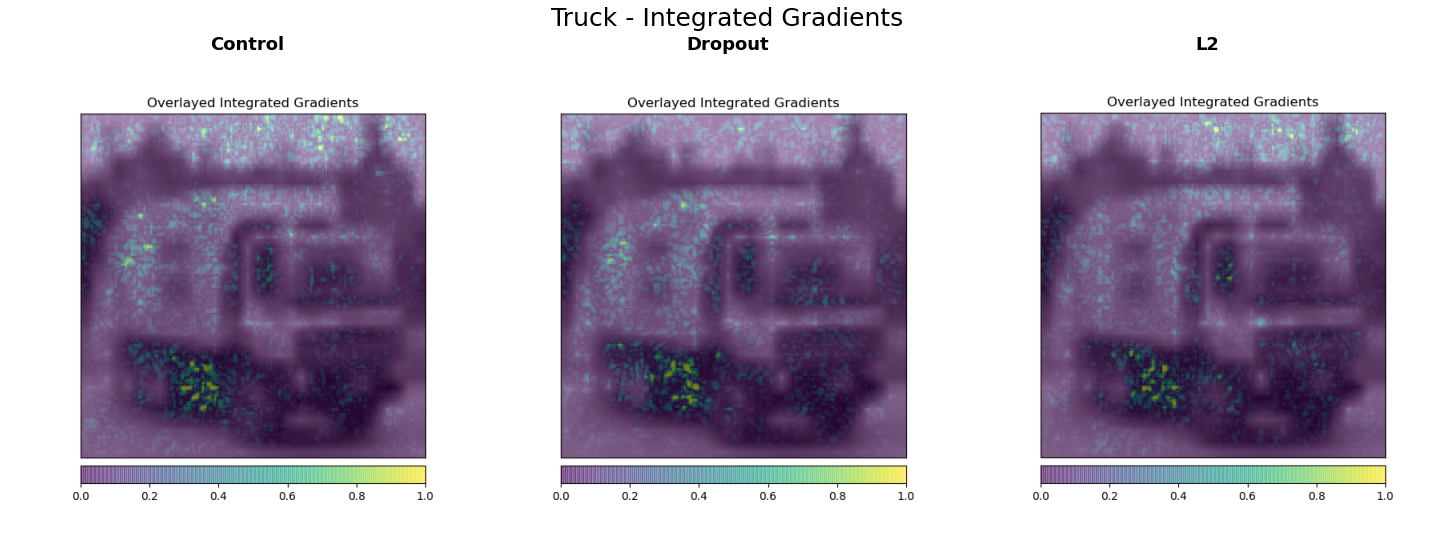

In [11]:
'''
Plot comparing gradient for one class of each type
'''

plot_conds_col = {0 : "control", 1 : "dropout", 2 : "l2"}
fig1 = plt.figure(figsize=(20, 15))

font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 18}

plot_conds_readable = {"control" : "Control", "dropout" : "Dropout", "l2" : "L2"}

for curr_class in classes:
  for im in im_type.keys():
    im_count = 1
    for row in range(3):
      curr_cond = conditions[plot_conds_col[row]]
      curr_type = im_type[im]
      curr_type_readbale = im_type_readbale[im]

      # curr_class = classes[6
      image_path = path + curr_cond + curr_class + curr_type
      curr_image = Image.open(image_path)

      ax = fig1.add_subplot(1, 3, im_count)
      ax.imshow(curr_image)
      ax.axis("off")
      ax.set_title(plot_conds_readable[plot_conds_col[row]], font)
      im_count+=1

    fig1.suptitle("{} - {}".format(curr_class.capitalize(), curr_type_readbale), y = 0.75 ,fontsize = 25, va = "baseline")
    plt.tight_layout(0, 0 ,0)
    # plt.subplot_tool()
    fig1.savefig('{}_{}.png'.format(curr_class, curr_type_readbale), dpi = 100, bbox_inches='tight')

In [12]:
from google.colab import files
import os

!zip -r /content/figures.zip /content/*.png
files.download('/content/figures.zip')

  adding: content/bird_Gradient Magnitudes.png (deflated 1%)
  adding: content/bird_Integrated Gradients.png (deflated 1%)
  adding: content/car_Gradient Magnitudes.png (deflated 1%)
  adding: content/car_Integrated Gradients.png (deflated 1%)
  adding: content/cat_Gradient Magnitudes.png (deflated 1%)
  adding: content/cat_Integrated Gradients.png (deflated 1%)
  adding: content/deer_Gradient Magnitudes.png (deflated 1%)
  adding: content/deer_Integrated Gradients.png (deflated 1%)
  adding: content/dog_Gradient Magnitudes.png (deflated 1%)
  adding: content/dog_Integrated Gradients.png (deflated 1%)
  adding: content/frog_Gradient Magnitudes.png (deflated 1%)
  adding: content/frog_Integrated Gradients.png (deflated 1%)
  adding: content/horse_Gradient Magnitudes.png (deflated 1%)
  adding: content/horse_Integrated Gradients.png (deflated 1%)
  adding: content/plane_Gradient Magnitudes.png (deflated 1%)
  adding: content/plane_Integrated Gradients.png (deflated 1%)
  adding: content/

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## VGG19

In [15]:
path = "/content/reg-explain/VGG19_Results/"
conditions = {"control" : "vgg19-control/",
              "dropout" : "vgg19-dropout/",
              "l2" : "vgg19-l2/"}
classes = ["bird", "car", "cat", "deer", "dog", "frog", "horse", "plane", "ship", "truck"]
im_type = {"gr" : "_gradient.png", "ig" : "_integrated.png"}
im_type_readbale = {"gr" : "Gradient Magnitudes", "ig" : "Integrated Gradients"}

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


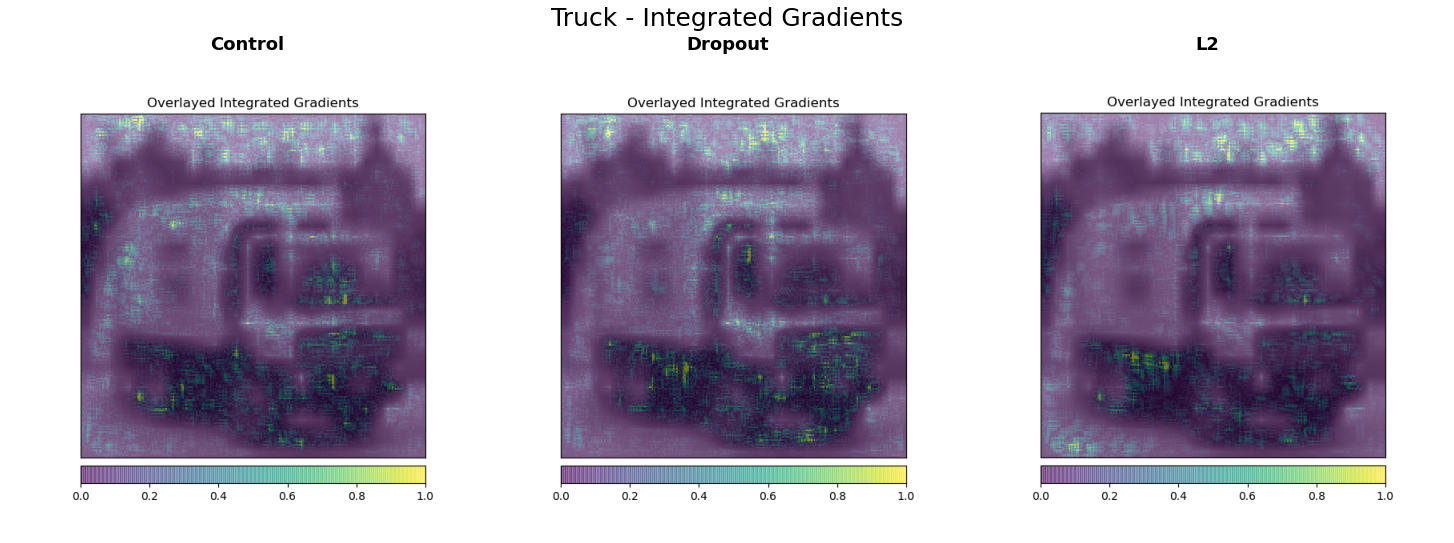

In [16]:
'''
Plot comparing gradient for one class of each type
'''

plot_conds_col = {0 : "control", 1 : "dropout", 2 : "l2"}
fig1 = plt.figure(figsize=(20, 15))

font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 18}

plot_conds_readable = {"control" : "Control", "dropout" : "Dropout", "l2" : "L2"}

for curr_class in classes:
  for im in im_type.keys():
    im_count = 1
    for row in range(3):
      curr_cond = conditions[plot_conds_col[row]]
      curr_type = im_type[im]
      curr_type_readbale = im_type_readbale[im]

      # curr_class = classes[6
      image_path = path + curr_cond + curr_class + curr_type
      curr_image = Image.open(image_path)

      ax = fig1.add_subplot(1, 3, im_count)
      ax.imshow(curr_image)
      ax.axis("off")
      ax.set_title(plot_conds_readable[plot_conds_col[row]], font)
      im_count+=1

    fig1.suptitle("{} - {}".format(curr_class.capitalize(), curr_type_readbale), y = 0.75 ,fontsize = 25, va = "baseline")
    plt.tight_layout(0, 0 ,0)
    # plt.subplot_tool()
    fig1.savefig('{}_{}.png'.format(curr_class, curr_type_readbale), dpi = 100, bbox_inches='tight')

In [17]:
from google.colab import files
import os

!zip -r /content/figures.zip /content/*.png
files.download('/content/figures.zip')

updating: content/bird_Gradient Magnitudes.png (deflated 1%)
updating: content/bird_Integrated Gradients.png (deflated 1%)
updating: content/car_Gradient Magnitudes.png (deflated 1%)
updating: content/car_Integrated Gradients.png (deflated 1%)
updating: content/cat_Gradient Magnitudes.png (deflated 1%)
updating: content/cat_Integrated Gradients.png (deflated 1%)
updating: content/deer_Gradient Magnitudes.png (deflated 1%)
updating: content/deer_Integrated Gradients.png (deflated 1%)
updating: content/dog_Gradient Magnitudes.png (deflated 1%)
updating: content/dog_Integrated Gradients.png (deflated 1%)
updating: content/frog_Gradient Magnitudes.png (deflated 1%)
updating: content/frog_Integrated Gradients.png (deflated 1%)
updating: content/horse_Gradient Magnitudes.png (deflated 1%)
updating: content/horse_Integrated Gradients.png (deflated 1%)
updating: content/plane_Gradient Magnitudes.png (deflated 1%)
updating: content/plane_Integrated Gradients.png (deflated 1%)
updating: content/

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>